### [공공데이터 분석 - 온도데이터]
- 데이터 : 기상청 사이트


[1] 모듈 로딩 및 데이터 준비 <hr>

In [43]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [44]:
## 데이터 준비
DATA_FILE = '../Data/대구_2000_20251110.csv'

daeguDF = pd.read_csv(DATA_FILE, skiprows=7)
daeguDF.head()




,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2000-01-01,143,4.7,0.0,8.5
1,\t2000-01-02,143,6.5,3.1,11.5
2,\t2000-01-03,143,2.9,0.0,6.8
3,\t2000-01-04,143,2.3,-2.4,7.5
4,\t2000-01-05,143,4.9,-0.9,9.4


[2] 데이터 확인<hr>


In [45]:
# 요약 정보 확인
daeguDF.info()
print(daeguDF['지점'].unique()) ## 143 밖에 없음

## => 날짜 커럼 앞부분 \t 공백 제거
## => 지점 컬럼 143으로 모두 동일

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       9445 non-null   object 
 1   지점       9445 non-null   int64  
 2   평균기온(℃)  9444 non-null   float64
 3   최저기온(℃)  9445 non-null   float64
 4   최고기온(℃)  9443 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 369.1+ KB
[143]


[3] 기본 전처리 => 불필요 컬럼과 데이터 삭제 <hr>

In [46]:
## 날짜 컬럼 공백 제거
daeguDF['날짜'] = daeguDF['날짜'].str.strip()
# daeguDF['날짜'] = daeguDF['날짜'].astype('datetime64[ns]')
print(daeguDF.head())

## 지점 컬럼 삭제
daeguDF.drop(columns = '지점', inplace = True)
print(daeguDF.head())

           날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  2000-01-01  143      4.7      0.0      8.5
1  2000-01-02  143      6.5      3.1     11.5
2  2000-01-03  143      2.9      0.0      6.8
3  2000-01-04  143      2.3     -2.4      7.5
4  2000-01-05  143      4.9     -0.9      9.4
           날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  2000-01-01      4.7      0.0      8.5
1  2000-01-02      6.5      3.1     11.5
2  2000-01-03      2.9      0.0      6.8
3  2000-01-04      2.3     -2.4      7.5
4  2000-01-05      4.9     -0.9      9.4


[3]  세부 전처리<hr>
- 결측치/중복값/ 이상치

In [47]:
## 결측치 
print(daeguDF.isna().sum())

## 결측치 존재 행 추출 => 필터렁
# daeguDF[(daeguDF['최고기온(℃)'].isna() == True) | (daeguDF['평균기온(℃)'].isna() == True) ]

## any : 1개 이상의 원소가 True라면 True
## all : 모두 True 면 True
## ★ 주의 ★ 
#     - 행 단위일 경우 axis = 1 : 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
#     - 열 단위일 경우 axis = 0 : 열을 구성하는 모든 원소 즉, 모든 행값을 확인 
display(daeguDF[ daeguDF.isna().any(axis=1) ])

daeguDF.tail(3)


날짜         0
평균기온(℃)    1
최저기온(℃)    0
최고기온(℃)    2
dtype: int64


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
5021,2013-09-30,NaN,20.1,NaN
8817,2024-02-21,5.1,3.6,NaN


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
9442,2025-11-07,13.1,7.7,20.6
9443,2025-11-08,12.9,7.8,18.3
9444,2025-11-09,14.6,11.1,19.3


In [48]:
## -----------------------------------------------------
## 중복값 체크 : 기온데이터는 중복 가능 => 유지!
## -----------------------------------------------------
print(daeguDF.iloc[:, 1:].duplicated().sum())

daeguDF[daeguDF.iloc[:, 1:].duplicated()]

duDF = daeguDF[daeguDF.duplicated(subset=daeguDF.columns[1:], keep=False)]
duDF.sort_values(by=['평균기온(℃)'])

duDF.info()


64
<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 9307
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       128 non-null    object 
 1   평균기온(℃)  128 non-null    float64
 2   최저기온(℃)  128 non-null    float64
 3   최고기온(℃)  128 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [49]:

## 이상치 체크
import sys
sys.path.append(r'C:\Users\kdt008\Desktop\KDT_10SL\EX_DATETIME\Utils')
import datautil as du

## 수치 컬럼의 이상치 검사
numeric_cols = daeguDF.select_dtypes(include='number')



## 수치 컬럼의 이상치 검사
du.get_outlier_records(daeguDF, numeric_cols)
# du.get_outlier_records(daeguDF, daeguDF.columns[1:])



[]

In [50]:
## 결측치 채우기
## 이전, 이후 값들의 평균값으로 결측치 채우기
# daeguDF.ffill(inplace=True) 
msDF = daeguDF[ daeguDF.isna().any(axis=1) ]
for idx in msDF.index :
    print(idx)
    ## 결측치인 컬럼명 가져오기
    cols = daeguDF.iloc[idx][daeguDF.iloc[idx].isna()].index
    print(cols)

    ## 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균 : {컬럼명 : 평균값, ..}
    fill_values = daeguDF[cols].iloc[idx-1 : idx+2].mean(numeric_only=True).to_dict()
    daeguDF.iloc[idx] = daeguDF.iloc[idx].fillna(fill_values)

daeguDF.isna().sum()
    


5021
Index(['평균기온(℃)', '최고기온(℃)'], dtype='object')
8817
Index(['최고기온(℃)'], dtype='object')


날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

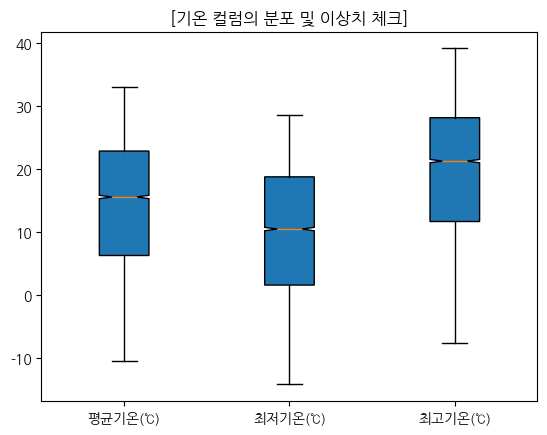

In [51]:
## 박스 플롯 이상치 시각화 : 결측치가 있는 컬럼은 시각화 안됨!! 
data_name = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
plt.boxplot(daeguDF[data_name],label=data_name, 
            notch=True,
            ## 박스 안쪽 여백색상설정
            patch_artist=True, 
            )

plt.title('[기온 컬럼의 분포 및 이상치 체크]')
plt.xticks([1,2,3], data_name)
plt.show()

[4] 탐색적 분석(EDA) <hr>

In [52]:
## 날짜 컬럼 : object => str이지만 날짜를 의미 : datetime64[ns]
daeguDF.날짜 = pd.to_datetime(daeguDF['날짜'])

daeguDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       9445 non-null   datetime64[ns]
 1   평균기온(℃)  9445 non-null   float64       
 2   최저기온(℃)  9445 non-null   float64       
 3   최고기온(℃)  9445 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 295.3 KB


In [57]:
## ---------------------------------------------------------------
## 날짜 컬럼 일단위 => 주기 (주 W, 월 M, 분기 Q, 년도 Y)
## ---------------------------------------------------------------
## period 배열 만들기
pr_m = pd.period_range(start=daeguDF['날짜'].iloc[0], 
                       end=daeguDF['날짜'].iloc[-1], 
                       freq='Y') ## 주단위a
print(pr_m, pr_m.shape)


PeriodIndex(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
             '2024', '2025'],
            dtype='period[Y-DEC]') (26,)


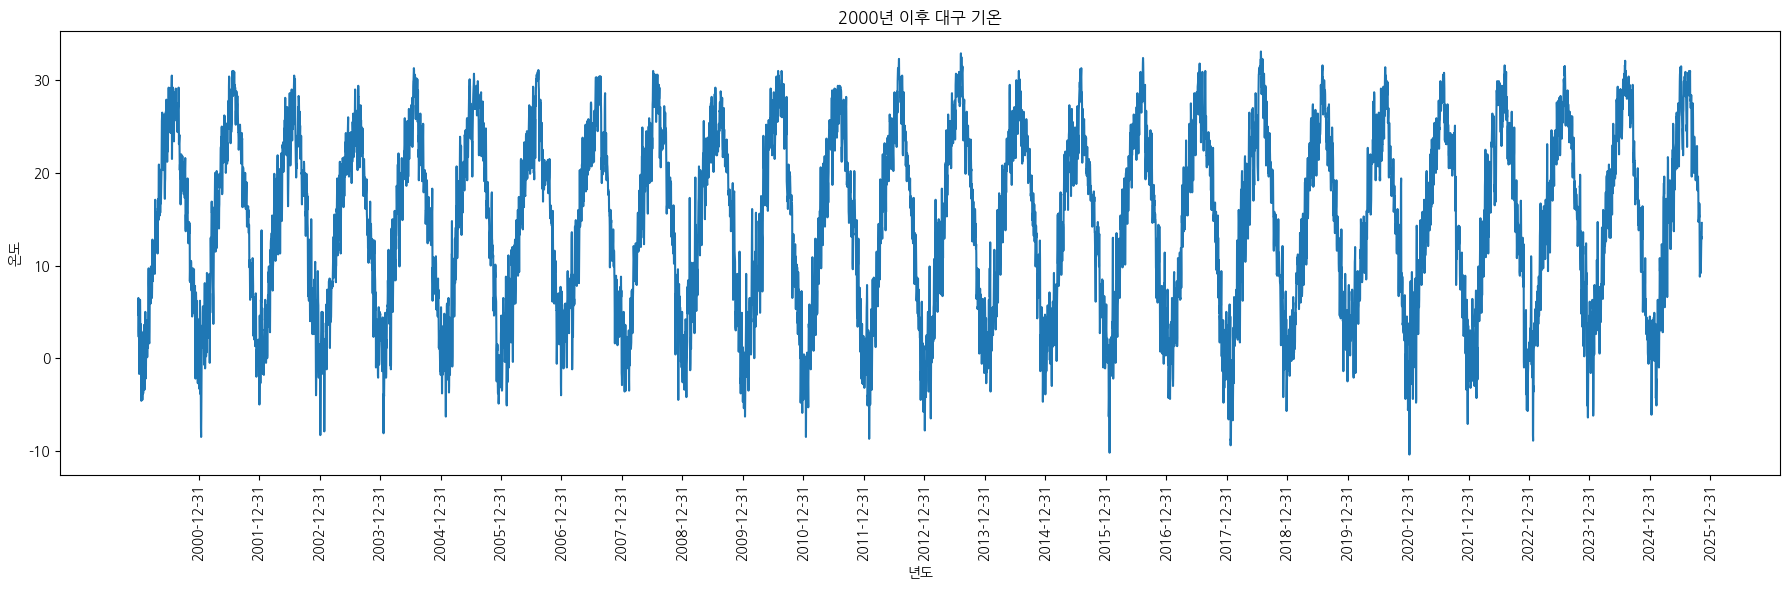

In [61]:
## 전체적인 대구시의 2000.1.1 ~ 2025.11.9까지 기온변환
# => 시간에 따른 흐름 : 선그래프
# x축 : 날짜  
# Y축 : 온도


plt.figure(figsize=(18,6))
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.title("2000년 이후 대구 기온")
plt.xticks(pr_m, rotation=90)
plt.xlabel('년도')
plt.ylabel('온도')
plt.tight_layout()
plt.show()

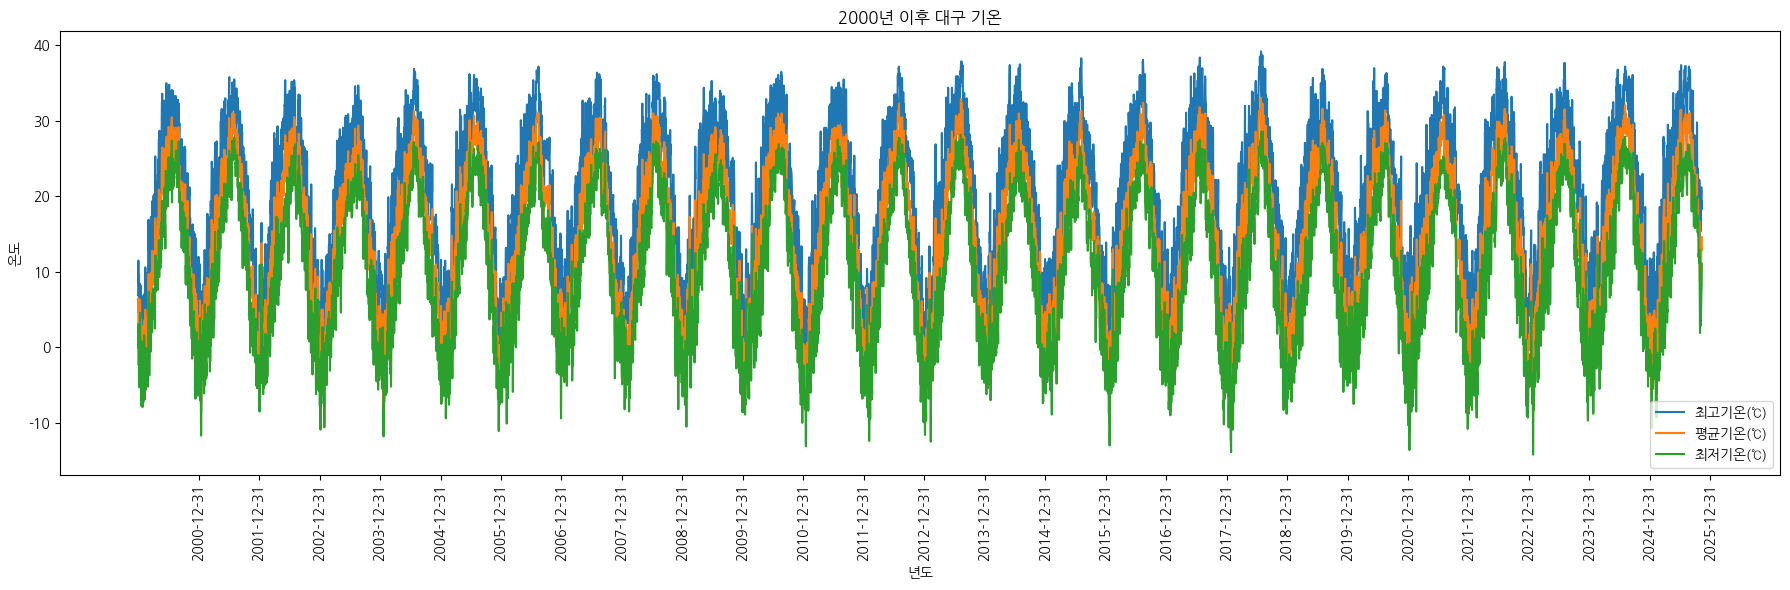

In [65]:
## 문제  년도별 최고,최저,평균 온도 시각화
## 막대 그래프

plt.figure(figsize=(18,6))
plt.plot(daeguDF['날짜'], daeguDF['최고기온(℃)'])
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.plot(daeguDF['날짜'], daeguDF['최저기온(℃)'])

plt.title("2000년 이후 대구 기온")
plt.xticks(pr_m, rotation=90) 
plt.xlabel('년도')
plt.ylabel('온도')
plt.tight_layout()
plt.legend(['최고기온(℃)', '평균기온(℃)', '최저기온(℃)'])
plt.show()

      최고기온(℃)    평균기온(℃)  최저기온(℃)
날짜                               
2000     35.0  14.287432     -7.9
2001     35.8  14.889863    -11.7
2002     35.4  14.192603     -8.5
2003     34.7  13.789041    -10.9
2004     36.9  14.866120    -11.8
2005     36.2  14.270685    -11.1
2006     37.2  14.661096    -10.1
2007     36.4  15.063562     -5.1
2008     36.2  14.683880     -8.5
2009     35.3  14.880000    -10.5
2010     36.5  14.408767    -10.0
2011     35.5  14.329863    -13.1
2012     37.2  14.101913    -12.4
2013     37.9  15.021370    -12.5
2014     37.5  14.980548     -7.4
2015     38.3  14.838904     -8.9
2016     38.1  14.640437    -13.0
2017     38.4  14.437534    -10.2
2018     39.2  14.189863    -13.9
2019     36.9  14.893425     -7.2
2020     37.0  14.545902    -10.3
2021     37.2  14.661096    -13.6
2022     37.8  14.771233     -9.3
2023     37.7  15.175342    -14.2
2024     37.2  15.850000     -8.8
2025     37.4  16.781789    -10.7


C:\Users\kdt008\AppData\Local\Temp\ipykernel_18056\4059043270.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


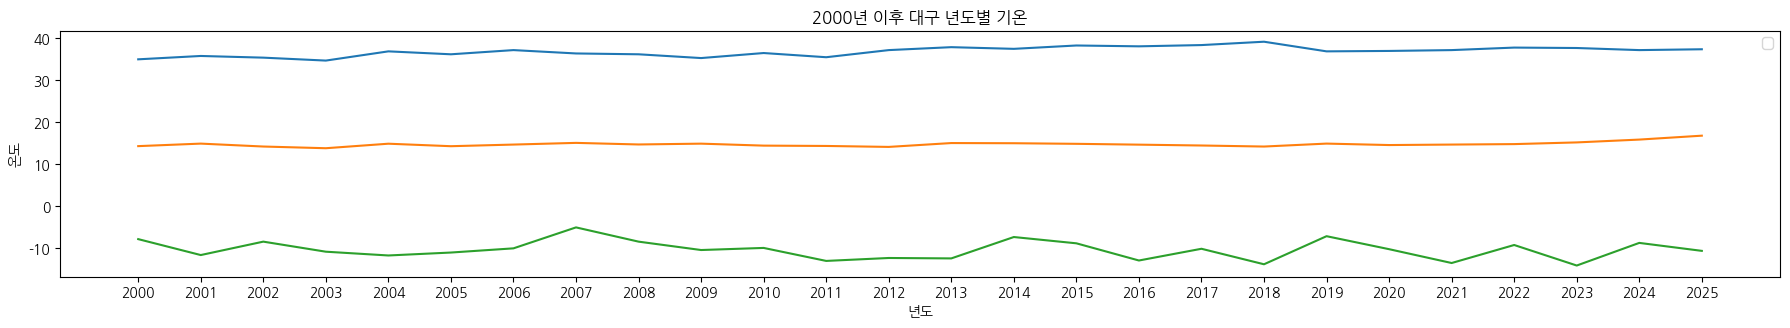

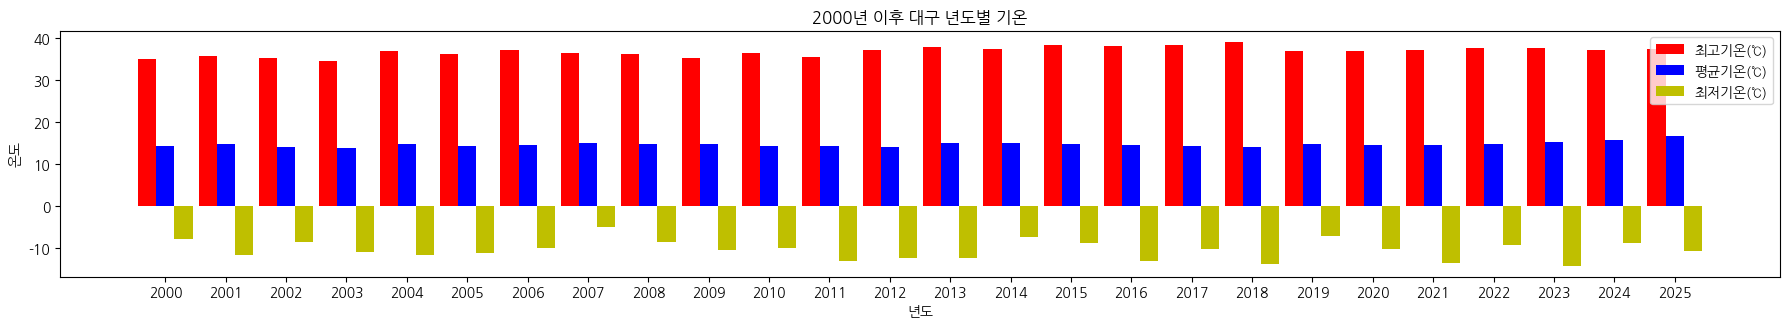

In [97]:
## 년도별 최저, 최고, 평균 온도 시각화
import numpy as np


groupedDF = daeguDF.groupby(daeguDF['날짜'].dt.year).agg({'최고기온(℃)' : 'max','평균기온(℃)' : 'mean','최저기온(℃)' : 'min'})
print(groupedDF)
plt.figure(figsize=(18,6))

plt.subplot(2,1,1)
plt.plot(groupedDF.index, groupedDF['최고기온(℃)'])
plt.plot(groupedDF.index, groupedDF['평균기온(℃)'])
plt.plot(groupedDF.index, groupedDF['최저기온(℃)'])

plt.title("2000년 이후 대구 년도별 기온")
plt.xlabel('년도')
plt.ylabel('온도')
plt.tight_layout()
plt.xticks(groupedDF.index)
plt.legend()
plt.show()



xdata = np.array(groupedDF.index.tolist())
ydata1 = groupedDF['최고기온(℃)'].tolist()
ydata2 = groupedDF['평균기온(℃)'].tolist()
ydata3 = groupedDF['최저기온(℃)'].tolist()

w = 0.3
plt.figure(figsize=(18,6))
plt.subplot(2,1,2)
plt.bar(xdata-w, ydata1, width=w, label='최고기온(℃)', color='r', align='center')
plt.bar(xdata, ydata2, width=w, label='평균기온(℃)', color='b', align='center')
plt.bar(xdata+w, ydata3, width=w, label='최저기온(℃)', color='y', align='center')
plt.title("2000년 이후 대구 년도별 기온")
plt.xlabel('년도')
plt.ylabel('온도')
plt.tight_layout()
plt.xticks(groupedDF.index)
plt.legend()
plt.show()

In [ ]:
## 과제 1. 여름이 길어지고 겨울이 짧아짐 => 25도 이상인 일수
                                #   => 다른지역도 해보기